In [2]:
import random  #importing the random module
import matplotlib.pyplot as plt #importing the matplotlib.pyplot module for plotting


# now we will create a function to simulate
def simulate_push(n):
#1: only one person knows the rumour initially
    informed={0}   # we are labelling different informed people with number starting from 0 to n-1
    rounds=0

    #2: continue until everyone knows the rumour
    while(len(informed)<n):
       new_informed=set(informed)# here we are copying the people who already know the rumour and putting it in a new set as we dont want repetition of people
       for u in informed:
           v=random.randint(0,n-1) # so loop over the informed people and selects a random person v from the population
           new_informed.add(v) # add v to the new informed set
       informed=new_informed # update the informed set to the new informed set
       rounds+=1 # increment the round count
       
    return rounds # return the total number of rounds taken to inform everyone
   # so till here we have created a function to simulate the push model of rumour spreading


print(simulate_push(10)) # testing the function with n=10 


def simulate_pull(n):
    informed={0}
    rounds =0

    #2. continue until everyone knows the rumour
    while(len(informed)<n):
        new_informed=set(informed)
        for u in range(n):
         v=random.randint(0,n-1)
         if v in informed:
                new_informed.add(u)
        informed=new_informed
        rounds+=1
    return rounds     


print(simulate_pull(10)) # testing the function with n=10


def simulate_push_pull(n):
    informed={0}
    rounds=0

    while(len(informed)<n):
        new_informed=set(informed)
        for u in range(n):
            v=random.randint(0,n-1)
            if u in informed:
                new_informed.add(v)
            elif v in informed:#if anybody is informed the other gets informed as well
                new_informed.add(u)
        informed=new_informed
        rounds+=1        

    return rounds


print(simulate_push_pull(10)) # testing the function with n=10


# Now we will do a simulation campaign here

n_values=[10,50,100,500,1000,5000]
push_results=[]
pull_results=[]     
push_pull_results=[]

for n in n_values:
    print(f"Simulating for n={n}")
    push_rounds=[]
    pull_rounds=[]
    push_pull_rounds=[]
    
    push_rounds=simulate_push(n)
    pull_rounds=simulate_pull(n)
    push_pull_rounds=simulate_push_pull(n)

    push_results.append(push_rounds)
    pull_results.append(pull_rounds)        
    push_pull_results.append(push_pull_rounds)

    print(f"Push: {push_rounds} rounds, Pull: {pull_rounds} rounds, Push-Pull: {push_pull_rounds} rounds")
    



    #Interesting things here are that push-pull is generally faster than either push or pull alone.
    #using 10^9 agents would freeze the computer so avoided that







11
5
3
Simulating for n=10
Push: 7 rounds, Pull: 4 rounds, Push-Pull: 4 rounds
Simulating for n=50
Push: 10 rounds, Pull: 8 rounds, Push-Pull: 6 rounds
Simulating for n=100
Push: 13 rounds, Pull: 11 rounds, Push-Pull: 7 rounds
Simulating for n=500
Push: 16 rounds, Pull: 16 rounds, Push-Pull: 8 rounds
Simulating for n=1000
Push: 18 rounds, Pull: 12 rounds, Push-Pull: 9 rounds
Simulating for n=5000
Push: 22 rounds, Pull: 16 rounds, Push-Pull: 10 rounds


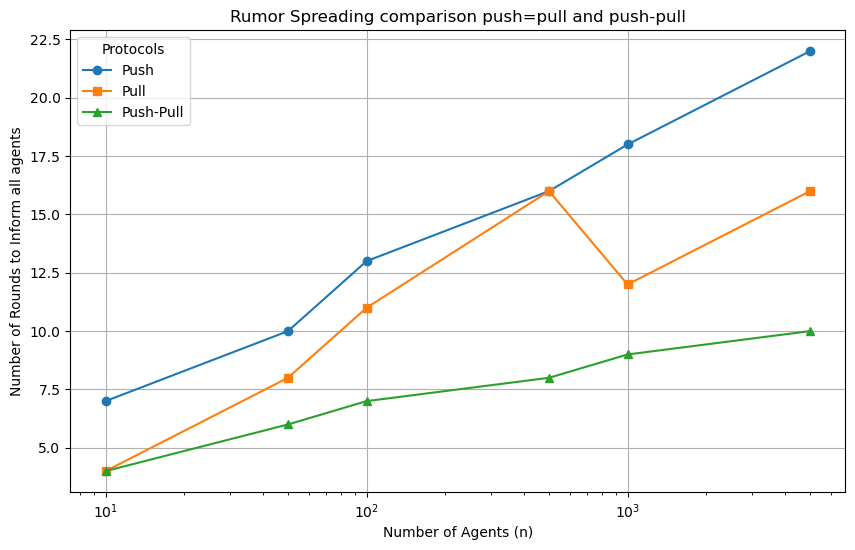

In [4]:
#visulaization of results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(n_values, push_results, label='Push', marker='o')
plt.plot(n_values, pull_results, label='Pull', marker='s')
plt.plot(n_values, push_pull_results, label='Push-Pull', marker='^')
plt.title("Rumor Spreading comparison push=pull and push-pull")
plt.xscale("log")

plt.xlabel('Number of Agents (n)')
plt.ylabel('Number of Rounds to Inform all agents')
plt.legend(title="Protocols")
plt.grid(True)

plt.savefig("rumor_spreading_comparison.png")  # Save the figure as a PNG file
plt.show()


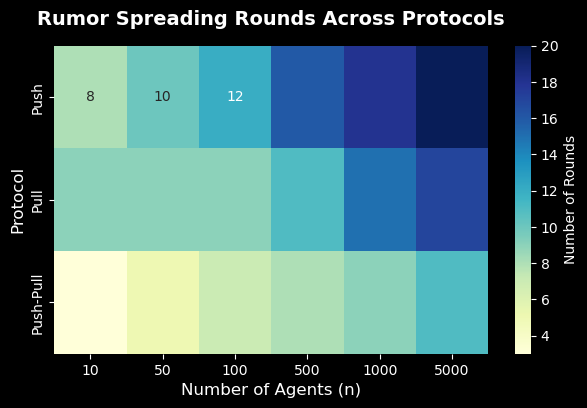

In [30]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data as a table
data = {
    "n": n_values,
    "Push": push_results,
    "Pull": pull_results,
    "Push-Pull": push_pull_results
}

# Convert to a DataFrame
df = pd.DataFrame(data).set_index("n").T  # Transpose so protocols are rows

# Create the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Rounds'})

# Titles and labels
plt.title("Rumor Spreading Rounds Across Protocols", fontsize=14, weight="bold", pad=15)
plt.xlabel("Number of Agents (n)", fontsize=12)
plt.ylabel("Protocol", fontsize=12)


plt.savefig("heatmap_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
